# Group Case Study : Loan Default Prediction 
#### Group Facilitator Name : Prabhat Mishra ( prabhatm0307@gmail.com)
#### Team Member: Deepanshu Pradhan (pradhand1@gmail.com)

## Exploratory Data Analysis (EDA) to understand Loan Default

#### Business Understanding

A consumer finance company specialised in lending various types of loans to urban customers. It is the largest online loan marketplace, facilitating personal loans, business loans, and financing of medical procedures. Borrowers can easily access lower interest rate loans through a fast online interface. 

When a loan application is received by the company, the company must make a decision to approve the loan based on the profile of the applicant. Two kinds of risks are linked to the choice of the bank

1. If the applicant is inclined to repay the loan, then not approving the loan will result in a business loss to the company
2. If the applicant is unlikely to repay the loan, i.e. if the applicant is inclined to default, then approving the loan may result in a financial loss to the company.

If the firm approves the loan, there are three possible scenarios outlined below:

   i. <b>Fully paid</b>: Applicant has fully paid the loan (the principal and the interest rate)
   
   ii.<b>Current</b>: Applicant is in the process of paying the instalments, i.e. the tenure of the loan is not yet completed.
   
   iii.<b>Charged-off</b>: Applicant has not paid the instalments in due time for a long period of time, i.e. he/she has defaulted on the loan 

#### Objective

Lending loans to ‘risky’ applicants is the largest source of financial loss (called credit loss). In other words, borrowers who default cause the largest amount of loss to the lenders.Such customers labelled as <b> 'charged-off' </b> are the <b>'defaulters'</b>. 

The objective is to understand the driving factors (or driver variables) behind loan default. The company can utilise this knowledge for its portfolio and risk assessment. 


# Exploratory Data Analysis (EDA) into below sections

#### 1. Data Sourcing

    i.  Loading Data into dataframe    
    ii. Defining Generic Functions for plotting and metadata
    
    
#### 2. Data Cleaning


    A. Null Value Analysis
        i.  Identify and drop columns with completly missing data
        ii. Identify and drop columns with more than 75% percentage missing data
        iii.Identify and drop columns having single value as they will not add any value to the analysis
        iv. Analyze Columns and identify/drop unnecessary columns
        
    B. Data Type Check for columns
    
    C. Converting object columns into correct datatype
        i. Converting the text columns from object to string
        ii.Converting the columns from % column to float post striping 
   
    D. Drop Duplicates Records
    
    E. Impute Null Values
    
    F. Derived Columns
        i.  Derive Month and Year from Issue Date
        ii. Derive Loan amount and Annual Income ratio
        iii.Adding frequency column for plotting 

#### 3. Univariate Analysis

    A. Continous Variables
        i.  Correlation/Heatmap
        ii.Perform univariate analysis on one of the strongly correlated columns
        
    B. Categorical Variables
        i. addr_state
        ii. emp_length
        iii. grade
        iv. home_ownership
        v. issue_year
        vi. loan_status
        vii. purpose
        viii. term
        ix. verification_status
    
    
#### 4. Bivariate/Multivariate Analysis

## 1. Data Sourcing
### i. Loading Data into dataframe

In [125]:
import pandas as pd
import numpy as np
import cufflinks as cf
import plotly as py
import plotly.graph_objs as go
import ipywidgets as widgets
from scipy import special 
import matplotlib.pyplot as plt
import seaborn as sns
import math
import sys
import cchardet as chardet
from pandas.api.types import is_string_dtype, is_numeric_dtype
from pandas_profiling import ProfileReport

sns.set(style="whitegrid")
pd.set_option('display.max_columns', 100)
py.offline.init_notebook_mode(connected=True) # plotting in offilne mode 
cf.set_config_file(offline=False, world_readable=True, theme='ggplot')
pd.set_option('display.max_colwidth', 1) # make sure data and columns are displayed correctly withput purge
pd.options.display.float_format = '{:20,.2f}'.format # display float value with correct precision 
with open("loan.csv", 'rb') as rawdata:
    result = chardet.detect(rawdata.read(10000))
encoding=result['encoding']
print(encoding)

ASCII


In [126]:
encoding="UTF-8"
loan_df = pd.read_csv("loan.csv",low_memory = False,encoding = encoding)
loan_df.shape

(39717, 111)

In [124]:
profile = ProfileReport(loan_df, title="Pandas Profiling Report",html={'style':{'full_width':True}})
profile.to_file("before_cleanup.html")

Summarize dataset:   0%|          | 0/124 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

### ii. Defining Generic Functions for plotting and metadata

In [127]:
def plot_bar_chart(plotting_frame,x_column,y_column) :
            
        x_axis_title = x_column.title()
        y_axis_title = y_column.title()
        
        graph_title = "Bar Chart [" + x_axis_title.title() + " Vs " + y_axis_title.title() + "]"
        
        layout = go.Layout(
             title = graph_title,
             yaxis=dict(
                title=y_axis_title
             ),
             xaxis=dict(
                 title=x_axis_title
             )
        )

        data_to_be_plotted = [
            go.Bar(
                x=plotting_frame[x_column], 
                y=plotting_frame[y_column]
            )
        ]


        figure = go.Figure(data=data_to_be_plotted,layout=layout)
        py.offline.iplot(figure)
        
        
def plot_pie_chart(plotting_frame,x_column,y_column) : 
        
        labels = plotting_frame[x_column].tolist()
        values = plotting_frame[y_column].tolist()

        trace = go.Pie(labels=labels, values=values)

        py.offline.iplot([trace])

        
def plot_box_chart(dataframe) :
    data = []
    for index, column_name in enumerate(dataframe) :
        data.append(
        go.Box(
            y=dataframe.iloc[:, index],
            name=column_name
         ))   
        
    layout = go.Layout(
    yaxis=dict(
        title="Frequency",
        zeroline=False
    ),
       boxmode='group'
    )
    
    fig = go.Figure(data=data, layout=layout)    
    py.offline.iplot(fig) 
    
def plot_group_bar_chart(plot,col,hue) : 
    hue_col = pd.Series(data = hue)
    fig, ax = plt.subplots()
    width = len(plot[col].unique()) + 6 + 5*len(hue_col.unique())
    fig.set_size_inches(width , 10)
    ax = sns.countplot(data = loan_plot, x= col, order=plot[col].value_counts().index,hue = hue,palette="Set2") 
    
    for p in ax.patches:
                # Some segment wise value we are getting as Nan as respective value not present to tackle the Nan using temp_height
                temp_height = p.get_height()
                
                if math.isnan(temp_height):
                    temp_height = 0.01
                    
                
                ax.annotate('{:1.1f}%'.format((temp_height*100)/float(len(loan_plot))), (p.get_x()+0.05, temp_height+20)) 
    
    plt.show()
    
# Method to determine metadata of any dataframe
def getMetadata(df) :
    metadata_info = pd.DataFrame({
        'Total_Element': df.count(), # total elements in columns            
        'Datatype' : df.dtypes, # data types of columns
        'Null_Count': df.isnull().sum(), # total null values in columns
        'Null_Percentage': df.isnull().sum()/len(df) * 100 # percentage of null values
                       })
    return metadata_info

def yearCal(date) :
    temp = date.split('-')[1]
    length = len(temp)
    if length == 2 :
        temp = "20"+temp
    else :
        temp = "200"+temp
        
    return temp

## 2. Data Cleaning
### A. Null Values Analysis

In [128]:
loan_metadata = getMetadata(loan_df)
loan_metadata_group = loan_metadata.groupby("Null_Percentage").count().reset_index()
loan_metadata_group.sort_values(["Null_Percentage"], axis=0,ascending=False, inplace=True)
plot_pie_chart(loan_metadata_group,"Null_Percentage","Null_Count")

<font color='green'/>**Analysis** - 54 columns are completely null and can be removed from further analysis

### i. Identify and drop columns with completly missing data

In [129]:
completly_missing_data = loan_metadata[loan_metadata["Null_Percentage"] == 100.0]
drop_missing_column = completly_missing_data.index.tolist()
print("Null Columns before deleting  : " + str(loan_df.shape[1]))
loan_df.drop(drop_missing_column,inplace=True,axis=1)
print("Null Columns after deleting : " + str(loan_df.shape[1]))

Null Columns before deleting  : 111
Null Columns after deleting : 57


<font color='green'/>**Analysis** - Approx 50% are dropped from further analysis

### ii. Identify and drop columns with more than 75% percentage missing data

In [130]:
missing_data_greater_75 = loan_metadata[(loan_metadata["Null_Percentage"] > 75.0) & (loan_metadata["Null_Percentage"] < 100.0)]
drop_missing_column_75 = missing_data_greater_75.index.tolist()
loan_df.drop(drop_missing_column_75,inplace=True,axis=1)
print("Shape after deleting 75% columns ",loan_df.shape ,"rows & columns.")

Shape after deleting 75% columns  (39717, 55) rows & columns.


### iii. Identify and drop columns having single value as they will not add any value to our analysis

In [131]:
unique_value = loan_df.nunique()
col_with_only_one_value = unique_value[unique_value.values == 1]
col_to_drop = col_with_only_one_value.index.tolist()
loan_df.drop(col_to_drop, axis =1, inplace=True)
print("Shape after deleting unique value columns ",loan_df.shape ,"rows & columns.")

Shape after deleting unique value columns  (39717, 46) rows & columns.


### iv. Analyize Columns and identify/drop unnecessary columns

In [132]:
loan_df.head(2)

id  member_id  loan_amnt  funded_amnt      funded_amnt_inv  \
0  1077501  1296599    5000       5000                    4,975.00   
1  1077430  1314167    2500       2500                    2,500.00   

         term int_rate          installment grade sub_grade emp_title  \
0   36 months  10.65%                162.87  B     B2        NaN        
1   60 months  15.27%                 59.83  C     C4        Ryder      

  emp_length home_ownership           annual_inc verification_status issue_d  \
0  10+ years  RENT                     24,000.00  Verified            Dec-11   
1  < 1 year   RENT                     30,000.00  Source Verified     Dec-11   

   loan_status  \
0  Fully Paid    
1  Charged Off   

                                                                url  \
0  https://lendingclub.com/browse/loanDetail.action?loan_id=1077501   
1  https://lendingclub.com/browse/loanDetail.action?loan_id=1077430   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             desc  \
0    Borrower added on 12/22/11 > I need to upgrade my business technologies.<br>                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   
1    Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possible/when i sell my old bike. I only need this money because the deal im looking at is to good to pass up.<br><br>  Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possible/when i sell my old bike.I only need this money because the deal im looking at is to good to pass up. I have finished college with an associates degree in business and its takingmeplaces<br>   

       purpose     title zip_code addr_state                  dti  \
0  credit_card  Computer  860xx    AZ                       27.65   
1  car          bike      309xx    GA                        1.00   

   delinq_2yrs earliest_cr_line  inq_last_6mths  mths_since_last_delinq  \
0  0            Jan-85           1              NaN                       
1  0            Apr-99           5              NaN                       

   open_acc  pub_rec  revol_bal revol_util  total_acc            out_prncp  \
0  3         0        13648      83.70%     9                         0.00   
1  3         0        1687       9.40%      4                         0.00   

         out_prncp_inv          total_pymnt      total_pymnt_inv  \
0                 0.00             5,863.16             5,833.84   
1                 0.00             1,008.71             1,008.71   

       total_rec_prncp        total_rec_int   total_rec_late_fee  \
0             5,000.00               863.16                 0.00   
1               456.46               435.17                 0.00   

            recoveries  collection_recovery_fee last_pymnt_d  \
0                 0.00                 0.00      Jan-15        
1               117.08                 1.11      Apr-13        

   

<font color='green'/>**Analysis** - By looking at the data , below fields doesn't add any value to our case study - 
1. url  : URL for the LC page with listing data.
2. desc : Loan description provided by the borrower
3. zip_code : The first 3 numbers of the zip code provided by the borrower in the loan application.
4. id : A unique LC assigned ID for the loan listing.
5. member_id :  This is a unique id and has no use

In [133]:
col_to_drop = ["url","desc","zip_code","id","member_id"]
loan_df.drop(col_to_drop,inplace=True,axis=1)
loan_df.head(5)
print("Shape after deleting unnecessary columns ",loan_df.shape ,"rows & columns.")

Shape after deleting unnecessary columns  (39717, 41) rows & columns.


In [134]:
profile = ProfileReport(loan_df, title="Pandas Profiling Report",html={'style':{'full_width':True}})
profile.to_file("post_cleanup.html")

Summarize dataset:   0%|          | 0/54 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

### B. Data Type Check for columns

In [73]:
loan_data_type = getMetadata(loan_df)
loan_data_type["Datatype"].value_counts()

object     17
float64    16
int64      8 
Name: Datatype, dtype: int64

In [74]:
loan_data_type_float = loan_data_type[loan_data_type["Datatype"] == "float64"]
loan_data_type_int = loan_data_type[loan_data_type["Datatype"] == "int64"]
loan_data_type_object = loan_data_type[loan_data_type["Datatype"] == "object"]

In [75]:
### float columns
loan_data_type_float_group = loan_data_type_float.groupby("Null_Percentage").count().reset_index()
plot_pie_chart(loan_data_type_float_group,"Null_Percentage","Null_Count")
loan_data_type_float

Total_Element Datatype  Null_Count  \
funded_amnt_inv          39717          float64  0            
installment              39717          float64  0            
annual_inc               39717          float64  0            
dti                      39717          float64  0            
mths_since_last_delinq   14035          float64  25682        
out_prncp                39717          float64  0            
out_prncp_inv            39717          float64  0            
total_pymnt              39717          float64  0            
total_pymnt_inv          39717          float64  0            
total_rec_prncp          39717          float64  0            
total_rec_int            39717          float64  0            
total_rec_late_fee       39717          float64  0            
recoveries               39717          float64  0            
collection_recovery_fee  39717          float64  0            
last_pymnt_amnt          39717          float64  0            
pub_rec_bankruptcies     39020          float64  697          

                             Null_Percentage  
funded_amnt_inv                         0.00  
installment                             0.00  
annual_inc                              0.00  
dti                                     0.00  
mths_since_last_delinq                 64.66  
out_prncp                               0.00  
out_prncp_inv                           0.00  
total_pymnt                             0.00  
total_pymnt_inv                         0.00  
total_rec_prncp                         0.00  
total_rec_int                           0.00  
total_rec_late_fee                      0.00  
recoveries                              0.00  
collection_recovery_fee                 0.00  
last_pymnt_amnt                         0.00  
pub_rec_bankruptcies                    1.75

<font color='green'/>**Analysis** - 87% of float datatypes have correct values and can be used for analyis 

In [76]:
## int columns
loan_data_type_int_group = loan_data_type_int.groupby("Null_Percentage").count().reset_index()
plot_pie_chart(loan_data_type_int_group,"Null_Percentage","Null_Count")
loan_data_type_int

Total_Element Datatype  Null_Count      Null_Percentage
loan_amnt       39717          int64    0                          0.00
funded_amnt     39717          int64    0                          0.00
delinq_2yrs     39717          int64    0                          0.00
inq_last_6mths  39717          int64    0                          0.00
open_acc        39717          int64    0                          0.00
pub_rec         39717          int64    0                          0.00
revol_bal       39717          int64    0                          0.00
total_acc       39717          int64    0                          0.00

<font color='green'/>**Analysis** - No missing values for integer columns

In [77]:
## object columns
loan_data_type_object_group = loan_data_type_object.groupby("Null_Percentage").count().reset_index()
plot_pie_chart(loan_data_type_object_group,"Null_Percentage","Null_Count")
loan_data_type_object

Total_Element Datatype  Null_Count      Null_Percentage
term                 39717          object   0                          0.00
int_rate             39717          object   0                          0.00
grade                39717          object   0                          0.00
sub_grade            39717          object   0                          0.00
emp_title            37258          object   2459                       6.19
emp_length           38642          object   1075                       2.71
home_ownership       39717          object   0                          0.00
verification_status  39717          object   0                          0.00
issue_d              39717          object   0                          0.00
loan_status          39717          object   0                          0.00
purpose              39717          object   0                          0.00
title                39706          object   11                         0.03
addr_state           39717          object   0                          0.00
earliest_cr_line     39717          object   0                          0.00
revol_util           39667          object   50                         0.13
last_pymnt_d         39646          object   71                         0.18
last_credit_pull_d   39715          object   2                          0.01

<font color='green'/>**Analysis** - ~65% of float datatypes have correct values and can be used for directly for analyis  post correction of datatype. Rest columns need to be imputed and converted

In [78]:
### for object dtype identify null and not null columns 
columns_to_convert_not_null = loan_data_type_object[loan_data_type_object["Null_Count"] == 0].index.tolist()
columns_to_convert_null = loan_data_type_object[loan_data_type_object["Null_Count"] > 0].index.tolist()
print(columns_to_convert_not_null)
print(columns_to_convert_null)

['term', 'int_rate', 'grade', 'sub_grade', 'home_ownership', 'verification_status', 'issue_d', 'loan_status', 'purpose', 'addr_state', 'earliest_cr_line']
['emp_title', 'emp_length', 'title', 'revol_util', 'last_pymnt_d', 'last_credit_pull_d']


### C. Converting object columns into correct datatype

In [79]:
loan_df[columns_to_convert_not_null].describe(include="all")

term int_rate  grade sub_grade home_ownership  \
count   39717       39717    39717  39717     39717           
unique  2           371      7      35        5               
top      36 months  10.99%   B      B3        RENT            
freq    29096       956      12020  2917      18899           

       verification_status issue_d loan_status             purpose addr_state  \
count   39717               39717   39717       39717               39717       
unique  3                   55      3           14                  50          
top     Not Verified        Dec-11  Fully Paid  debt_consolidation  CA          
freq    16921               2260    32950       18641               7099        

       earliest_cr_line  
count   39717            
unique  526              
top     Nov-98           
freq    370

In [80]:
loan_df[columns_to_convert_null].describe(include="all")

emp_title emp_length               title revol_util last_pymnt_d  \
count   37258     38642      39706               39667      39646         
unique  28820     11         19615               1089       101           
top     US Army   10+ years  Debt Consolidation  0%         May-16        
freq    134       8879       2184                977        1256          

       last_credit_pull_d  
count   39715              
unique  106                
top     May-16             
freq    10308

#### i. Converting the text columns from object to string

In [81]:
loan_df[['last_pymnt_d','last_credit_pull_d','term','grade', 
         'sub_grade', 'home_ownership','verification_status', 
         'loan_status', 'purpose', 'addr_state',
         'emp_title', 'emp_length', 'title','issue_d','earliest_cr_line']]=loan_df[['last_pymnt_d','last_credit_pull_d','term','grade', 
                                                       'sub_grade', 'home_ownership','verification_status', 
                                                       'loan_status', 'purpose', 'addr_state','emp_title', 
                                                       'emp_length', 'title','issue_d','earliest_cr_line']].astype("string")

In [82]:
loan_df.head(2)

loan_amnt  funded_amnt      funded_amnt_inv        term int_rate  \
0  5000       5000                    4,975.00   36 months  10.65%    
1  2500       2500                    2,500.00   60 months  15.27%    

           installment grade sub_grade emp_title emp_length home_ownership  \
0               162.87  B     B2        <NA>      10+ years  RENT            
1                59.83  C     C4        Ryder     < 1 year   RENT            

            annual_inc verification_status issue_d  loan_status      purpose  \
0            24,000.00  Verified            Dec-11  Fully Paid   credit_card   
1            30,000.00  Source Verified     Dec-11  Charged Off  car           

      title addr_state                  dti  delinq_2yrs earliest_cr_line  \
0  Computer  AZ                       27.65  0            Jan-85            
1  bike      GA                        1.00  0            Apr-99            

   inq_last_6mths  mths_since_last_delinq  open_acc  pub_rec  revol_bal  \
0  1              NaN                      3         0        13648       
1  5              NaN                      3         0        1687        

  revol_util  total_acc            out_prncp        out_prncp_inv  \
0  83.70%     9                         0.00                 0.00   
1  9.40%      4                         0.00                 0.00   

           total_pymnt      total_pymnt_inv      total_rec_prncp  \
0             5,863.16             5,833.84             5,000.00   
1             1,008.71             1,008.71               456.46   

         total_rec_int   total_rec_late_fee           recoveries  \
0               863.16                 0.00                 0.00   
1               435.17                 0.00               117.08   

   collection_recovery_fee last_pymnt_d      last_pymnt_amnt  \
0                 0.00      Jan-15                    171.62   
1                 1.11      Apr-13                    119.66   

  last_credit_pull_d  pub_rec_bankruptcies  
0  May-16                            0.00   
1  Sep-13                            0.00

#### ii. Converting the text columns from % column to float post striping 

In [83]:
loan_df["int_rate"] = loan_df["int_rate"].apply(lambda x: x.rstrip("%")).astype(float)
loan_df["revol_util"]=loan_df["revol_util"].astype(str).apply(lambda x: x.replace("%","")).astype(float)
loan_df.head(2)

loan_amnt  funded_amnt      funded_amnt_inv        term  \
0  5000       5000                    4,975.00   36 months   
1  2500       2500                    2,500.00   60 months   

              int_rate          installment grade sub_grade emp_title  \
0                10.65               162.87  B     B2        <NA>       
1                15.27                59.83  C     C4        Ryder      

  emp_length home_ownership           annual_inc verification_status issue_d  \
0  10+ years  RENT                     24,000.00  Verified            Dec-11   
1  < 1 year   RENT                     30,000.00  Source Verified     Dec-11   

   loan_status      purpose     title addr_state                  dti  \
0  Fully Paid   credit_card  Computer  AZ                       27.65   
1  Charged Off  car          bike      GA                        1.00   

   delinq_2yrs earliest_cr_line  inq_last_6mths  mths_since_last_delinq  \
0  0            Jan-85           1              NaN                       
1  0            Apr-99           5              NaN                       

   open_acc  pub_rec  revol_bal           revol_util  total_acc  \
0  3         0        13648                    83.70  9           
1  3         0        1687                      9.40  4           

             out_prncp        out_prncp_inv          total_pymnt  \
0                 0.00                 0.00             5,863.16   
1                 0.00                 0.00             1,008.71   

       total_pymnt_inv      total_rec_prncp        total_rec_int  \
0             5,833.84             5,000.00               863.16   
1             1,008.71               456.46               435.17   

    total_rec_late_fee           recoveries  collection_recovery_fee  \
0                 0.00                 0.00                 0.00       
1                 0.00               117.08                 1.11       

  last_pymnt_d      last_pymnt_amnt last_credit_pull_d  pub_rec_bankruptcies  
0  Jan-15                    171.62  May-16                            0.00   
1  Apr-13                    119.66  Sep-13                            0.00

In [84]:
print(loan_df.shape)
loan_data_type = getMetadata(loan_df)
loan_data_type["Datatype"].value_counts()

(39717, 41)


float64    18
string     15
int64      8 
Name: Datatype, dtype: int64

### D. Drop Duplicates Records

In [85]:
print("Records before dropping duplicates  : " + str(loan_df.shape[0]))
loan_df.drop_duplicates(keep=False,inplace=True)
print("Records after dropping duplicates  : " + str(loan_df.shape[0]))

Records before dropping duplicates  : 39717
Records after dropping duplicates  : 39717


### D. Imputing Null Values

In [136]:
impute_columns = getMetadata(loan_df)
impute_columns = impute_columns[impute_columns["Null_Count"] > 0]
impute_columns.sort_values(by="Null_Count",ascending = False)

Total_Element Datatype  Null_Count  \
mths_since_last_delinq  14035          float64  25682        
emp_title               37258          object   2459         
emp_length              38642          object   1075         
pub_rec_bankruptcies    39020          float64  697          
last_pymnt_d            39646          object   71           
revol_util              39667          object   50           
title                   39706          object   11           
last_credit_pull_d      39715          object   2            

                            Null_Percentage  
mths_since_last_delinq                64.66  
emp_title                              6.19  
emp_length                             2.71  
pub_rec_bankruptcies                   1.75  
last_pymnt_d                           0.18  
revol_util                             0.13  
title                                  0.03  
last_credit_pull_d                     0.01

<font color='green'/>**Analysis** -By looking at above we need to handle **emp_length** as this will be out main feature for analysis and we can delete **title and emp_title** as they are non relevant

In [87]:
## Dropping title and emp title 
to_drop = ["title","emp_title"]
loan_df.drop(to_drop , inplace=True,axis=1)

In [88]:
loan_df_temp = loan_df.filter(impute_columns.index.tolist())
loan_df_temp.head()

emp_length  mths_since_last_delinq           revol_util last_pymnt_d  \
0  10+ years NaN                                    83.70  Jan-15        
1  < 1 year  NaN                                     9.40  Apr-13        
2  10+ years NaN                                    98.50  Jun-14        
3  10+ years                35.00                   21.00  Jan-15        
4  1 year                   38.00                   53.90  May-16        

  last_credit_pull_d  pub_rec_bankruptcies  
0  May-16                            0.00   
1  Sep-13                            0.00   
2  May-16                            0.00   
3  Apr-16                            0.00   
4  May-16                            0.00

<font color='green'/>**Analysis** - For missing employment length, imputing it with Unknown value

In [89]:
## Imputing employee length with unknown value
## Imputing continous values with median
loan_df["emp_length"].fillna('Unknown',inplace=True)
loan_df["mths_since_last_delinq"].fillna((loan_df["mths_since_last_delinq"].median()),inplace=True)
loan_df["revol_util"].fillna((loan_df["revol_util"].median()),inplace=True)
loan_df["pub_rec_bankruptcies"].fillna((loan_df["pub_rec_bankruptcies"].median()),inplace=True)

### E. Derived Metrics

#### i. Derive Month and Year from Issue Date

In [90]:
loan_df['issue_month']  = loan_df['issue_d'].apply(lambda date:date.split('-')[0]).astype("string")
loan_df['issue_year'] = loan_df['issue_d'].apply(yearCal).astype("string")
loan_df[['issue_d','issue_month','issue_year']].head()

issue_d issue_month issue_year
0  Dec-11  Dec         2011     
1  Dec-11  Dec         2011     
2  Dec-11  Dec         2011     
3  Dec-11  Dec         2011     
4  Dec-11  Dec         2011

#### ii. Derive Loan amount and Annual Income ratio

In [91]:
loan_df['loan_amt_income_ratio']=loan_df['loan_amnt']/loan_df['annual_inc']
loan_df[['loan_amt_income_ratio','loan_amnt','annual_inc']].head()

loan_amt_income_ratio  loan_amnt           annual_inc
0                 0.21    5000                 24,000.00
1                 0.08    2500                 30,000.00
2                 0.20    2400                 12,252.00
3                 0.20    10000                49,200.00
4                 0.04    3000                 80,000.00

#### iii. Adding frequency column for plotting

In [92]:
loan_df["frequency"] = loan_df["loan_amnt"] - loan_df["loan_amnt"]

## 3.Univariate Analysis

In [93]:
num_list = []
cat_list = []

for column in loan_df:
    if is_numeric_dtype(loan_df[column]):
        num_list.append(column)
    elif is_string_dtype(loan_df[column]):
        cat_list.append(column)    

print("Category Columns:",cat_list)
print("Continous Columns:",num_list)

Category Columns: ['term', 'grade', 'sub_grade', 'emp_length', 'home_ownership', 'verification_status', 'issue_d', 'loan_status', 'purpose', 'addr_state', 'earliest_cr_line', 'last_pymnt_d', 'last_credit_pull_d', 'issue_month', 'issue_year']
Continous Columns: ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'mths_since_last_delinq', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_amnt', 'pub_rec_bankruptcies', 'loan_amt_income_ratio', 'frequency']


In [94]:
loan_df

loan_amnt  funded_amnt      funded_amnt_inv        term  \
0      5000       5000                    4,975.00   36 months   
1      2500       2500                    2,500.00   60 months   
2      2400       2400                    2,400.00   36 months   
3      10000      10000                  10,000.00   36 months   
4      3000       3000                    3,000.00   60 months   
...     ...        ...                         ...         ...   
39712  2500       2500                    1,075.00   36 months   
39713  8500       8500                      875.00   36 months   
39714  5000       5000                    1,325.00   36 months   
39715  5000       5000                      650.00   36 months   
39716  7500       7500                      800.00   36 months   

                  int_rate          installment grade sub_grade emp_length  \
0                    10.65               162.87  B     B2        10+ years   
1                    15.27                59.83  C     C4        < 1 year    
2                    15.96                84.33  C     C5        10+ years   
3                    13.49               339.31  C     C1        10+ years   
4                    12.69                67.79  B     B5        1 year      
...                    ...                  ... ..     ..           ...      
39712                 8.07                78.42  A     A4        4 years     
39713                10.28               275.38  C     C1        3 years     
39714                 8.07               156.84  A     A4        < 1 year    
39715                 7.43               155.38  A     A2        < 1 year    
39716                13.75               255.43  E     E2        < 1 year    

      home_ownership           annual_inc verification_status issue_d  \
0      RENT                     24,000.00  Verified            Dec-11   
1      RENT                     30,000.00  Source Verified     Dec-11   
2      RENT                     12,252.00  Not Verified        Dec-11   
3      RENT                     49,200.00  Source Verified     Dec-11   
4      RENT                     80,000.00  Source Verified     Dec-11   
...     ...                           ...              ...        ...   
39712  MORTGAGE                110,000.00  Not Verified        Jul-07   
39713  RENT                     18,000.00  Not Verified        Jul-07   
39714  MORTGAGE                100,000.00  Not Verified        Jul-07   
39715  MORTGAGE                200,000.00  Not Verified        Jul-07   
39716  OWN                      22,000.00  Not Verified        Jun-07   

       loan_status             purpose addr_state                  dti  \
0      Fully Paid   credit_card         AZ                       27.65   
1      Charged Off  car                 GA                        1.00   
2      Fully Paid   small_business      IL                        8.72   
3      Fully Paid   other               CA                       20.00   
4      Current      other               OR                       17.94   
...        ...        ...               ..                         ...   
39712  Fully Paid   home_improvement    CO                       11.33   
39713  Fully Paid   credit_card         NC                        6.40   
39714  Fully Paid   debt_consolidation  MA                        2.30   
39715  Fully Paid   other               MD                        3.72   
39716  Fully Paid   debt_consolidation  MA                       14.29   

       delinq_2yrs earliest_cr_line  inq_last_6mths  mths_since_last_delinq  \
0      0            Jan-85           1                             34.00      
1      0            Apr-99           5                             34.00      
2      0            Nov-01           2                             34.00      
3      0            Feb-96           1                             35.00      
4      0            Jan-96           0                             38.00      
...   ..               ...          .

### A. Continous Variables
#### i. Correlation/Heatmap

In [95]:
loan_corr=loan_df.corr()
loan_corr

loan_amnt          funded_amnt  \
loan_amnt                               1.00                 0.98   
funded_amnt                             0.98                 1.00   
funded_amnt_inv                         0.94                 0.96   
int_rate                                0.31                 0.31   
installment                             0.93                 0.96   
annual_inc                              0.27                 0.27   
dti                                     0.07                 0.07   
delinq_2yrs                            -0.03                -0.03   
inq_last_6mths                          0.01                 0.01   
mths_since_last_delinq                  0.00                 0.00   
open_acc                                0.18                 0.18   
pub_rec                                -0.05                -0.05   
revol_bal                               0.32                 0.31   
revol_util                              0.07                 0.07   
total_acc                               0.26                 0.25   
out_prncp                               0.19                 0.19   
out_prncp_inv                           0.19                 0.19   
total_pymnt                             0.89                 0.90   
total_pymnt_inv                         0.85                 0.87   
total_rec_prncp                         0.85                 0.87   
total_rec_int                           0.73                 0.74   
total_rec_late_fee                      0.04                 0.05   
recoveries                              0.14                 0.14   
collection_recovery_fee                 0.07                 0.07   
last_pymnt_amnt                         0.45                 0.45   
pub_rec_bankruptcies                   -0.04                -0.04   
loan_amt_income_ratio                   0.61                 0.59   
frequency               NaN                  NaN                    

                             funded_amnt_inv             int_rate  \
loan_amnt                               0.94                 0.31   
funded_amnt                             0.96                 0.31   
funded_amnt_inv                         1.00                 0.31   
int_rate                                0.31                 1.00   
installment                             0.91                 0.28   
annual_inc                              0.25                 0.05   
dti                                     0.07                 0.11   
delinq_2yrs                            -0.04                 0.16   
inq_last_6mths                         -0.01                 0.13   
mths_since_last_delinq                  0.03                -0.02   
open_acc                                0.16                 0.01   
pub_rec                                -0.05                 0.10   
revol_bal                               0.29                 0.10   
revol_util                              0.07                 0.47   
total_acc                               0.24                -0.04   
out_prncp                               0.20                 0.13   
out_prncp_inv                           0.20                 0.13   
total_pymnt                             0.88                 0.31   
total_pymnt_inv                         0.91                 0.30   
total_rec_prncp                         0.85                 0.19   
total_rec_int                           0.73                 0.53   
total_rec_late_fee                      0.03                 0.09   
recoveries                              0.12                 0.12   
collection_recovery_fee                 0.06                 0.07   
last_pymnt_amnt                         0.44                 0.16   
pub_rec_bankruptcies                   -0.04                 0.08   
loan_amt_income_ratio                   0.57                 0.21   
frequency               NaN                  NaN                    

                               

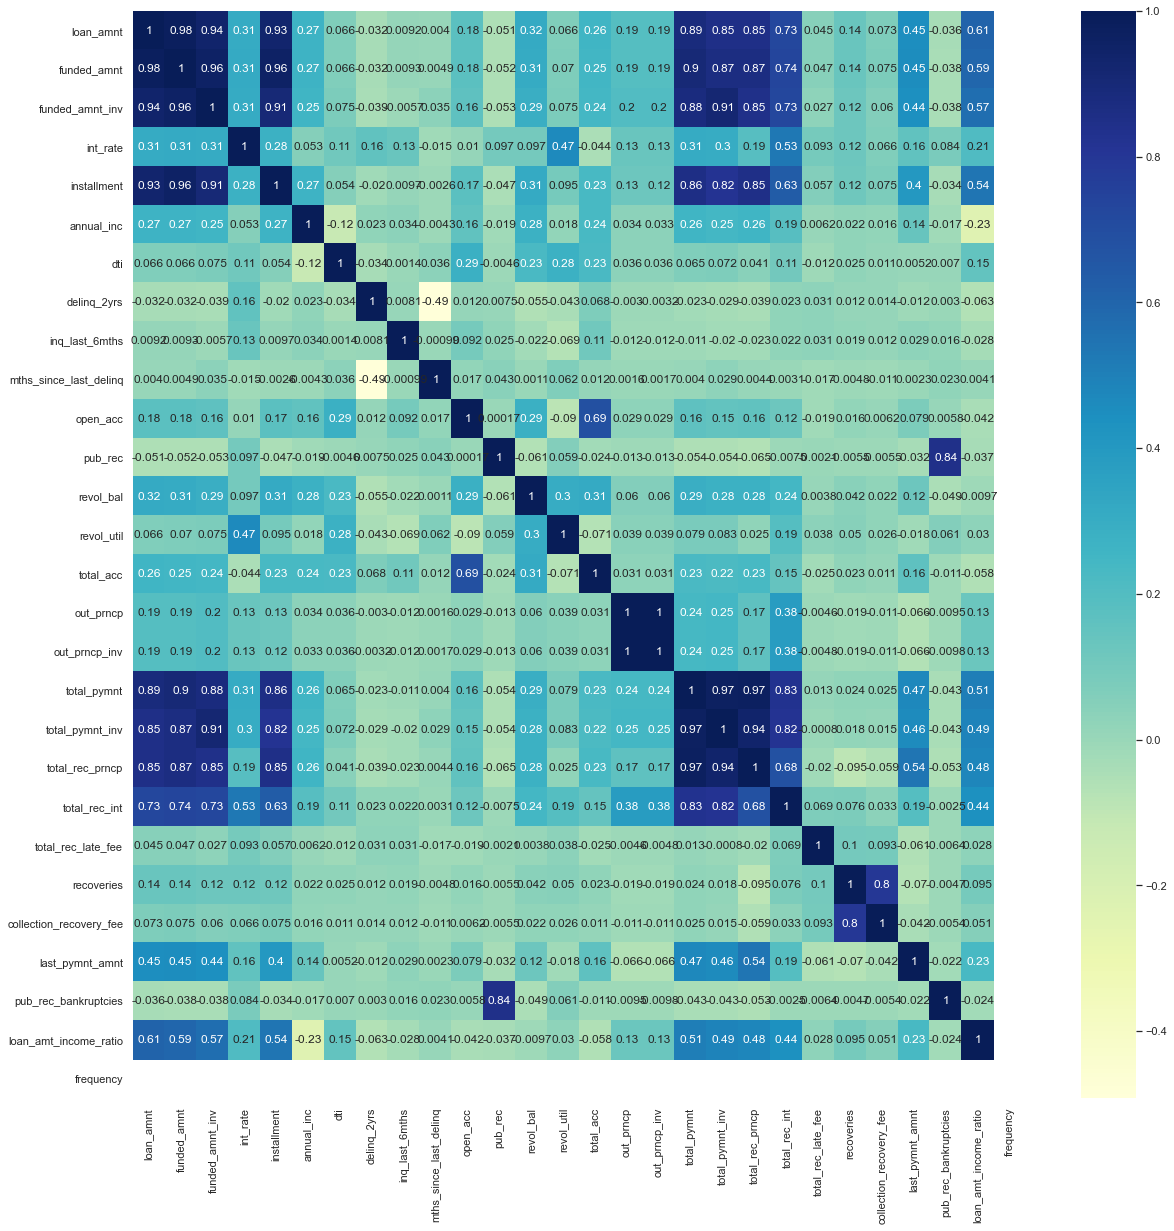

In [96]:
plt.subplots(figsize=(20, 20))
sns.heatmap(loan_corr, 
            xticklabels=loan_corr.columns.values,
            yticklabels=loan_corr.columns.values,cmap="YlGnBu",annot= True)
plt.show()

<font color='green'/>**Analysis** - It is clear from the following variables are directly correlated:
1. loan_amnt,funded_amnt,funded_amnt_inv,installment,total_pymnt,total_pymnt_inv,total_rec_prncp
2. recoveries,collection_recovery_fee
3. pub_rec,pub_rec_bankruptcies
4. open_acc,total_acc
5. out_prncp,out_prncp_inv

columns which are inversely proportional

1. int_rate,total_acc
2. delinq_2yrs,mths_since_last_delinq
3. revol_util,open_acc

We can select one of the columns from each group as they will have same impact on the target variable

#### ii. Loan Amount

In [97]:
plot_box_chart(pd.DataFrame(loan_df["loan_amnt"]))

<font color='green'/>**Analysis** - Most of the loan amount is distributed between **Rs. 5500 to Rs. 15000**

#### iii.Annual Income

In [98]:
plot_box_chart(pd.DataFrame(loan_df["annual_inc"]))

<font color='green'/>**Analysis** - The income graph is skewed due to outliers in it.

In [99]:
loan_df["annual_inc"].describe(percentiles=[0.25,0.50,0.75,0.85,0.95,0.99,0.995])

count              39,717.00
mean               68,968.93
std                63,793.77
min                 4,000.00
25%                40,404.00
50%                59,000.00
75%                82,300.00
85%               100,000.00
95%               142,000.00
99%               234,999.36
99.5%             300,000.00
max             6,000,000.00
Name: annual_inc, dtype: float64

<font color='green'/>**Analysis** - Clearly there is a outlier beyond 95% distribution which needs to be corrected

In [100]:
outlier = loan_df["annual_inc"].quantile(0.995)
loan_df = loan_df[loan_df["annual_inc"] < outlier]
loan_df["annual_inc"].describe(percentiles=[0.25,0.50,0.75,0.85,0.95,0.99,0.995])
plot_box_chart(pd.DataFrame(loan_df["annual_inc"])) 

<font color='green'/>**Analysis** - Now, the annual income is distributed between **40k** and **80k**

#### iv. Interest Rate

In [101]:
plot_box_chart(pd.DataFrame(loan_df["int_rate"]))

<font color='green'/>**Analysis** - the interest rate is distributed between **9.07** and **14.54**

#### v. DTI

In [102]:
plot_box_chart(pd.DataFrame(loan_df["dti"]))

<font color='green'/>**Analysis** - DTI is distributed between **8.32** and **18.69**

### B. Categorical Variables

In [103]:
loan_df[cat_list].head(5)

term grade sub_grade emp_length home_ownership verification_status  \
0   36 months  B     B2        10+ years  RENT           Verified             
1   60 months  C     C4        < 1 year   RENT           Source Verified      
2   36 months  C     C5        10+ years  RENT           Not Verified         
3   36 months  C     C1        10+ years  RENT           Source Verified      
4   60 months  B     B5        1 year     RENT           Source Verified      

  issue_d  loan_status         purpose addr_state earliest_cr_line  \
0  Dec-11  Fully Paid   credit_card     AZ         Jan-85            
1  Dec-11  Charged Off  car             GA         Apr-99            
2  Dec-11  Fully Paid   small_business  IL         Nov-01            
3  Dec-11  Fully Paid   other           CA         Feb-96            
4  Dec-11  Current      other           OR         Jan-96            

  last_pymnt_d last_credit_pull_d issue_month issue_year  
0  Jan-15       May-16             Dec         2011       
1  Apr-13       Sep-13             Dec         2011       
2  Jun-14       May-16             Dec         2011       
3  Jan-15       Apr-16             Dec         2011       
4  May-16       May-16             Dec         2011

**Plotting graphs for following variables -** 

1. addr_state
2. emp_length
3. grade
4. home_ownership
5. issue_year
6. loan_status
7. purpose
8. term
9. verification_status

#### i. Addr_state

In [104]:
plot = loan_df.groupby("addr_state").frequency.count().reset_index()
plot_bar_chart(plot,"addr_state","frequency")

<font color='green'/>**Analysis** - Most of records are from CA

In [105]:
plot = loan_df.groupby("emp_length").frequency.count().reset_index()
plot_bar_chart(plot,"emp_length","frequency")

<font color='green'/>**Analysis** - Most of records are from 10+ years experience individuals

In [106]:
plot = loan_df.groupby("grade").frequency.count().reset_index()
plot_bar_chart(plot,"grade","frequency")

<font color='green'/>**Analysis** - Most of records are from grade B applicants

In [107]:
plot = loan_df.groupby("home_ownership").frequency.count().reset_index()
plot_bar_chart(plot,"home_ownership","frequency")

<font color='green'/>**Analysis** - Most of records are from applicants with **Mortage** or **Rent** 

In [108]:
plot = loan_df.groupby("issue_year").frequency.count().reset_index()
plot_bar_chart(plot,"issue_year","frequency")

<font color='green'/>**Analysis** - Most of records are for applicants from 2011

In [109]:
plot = loan_df.groupby("loan_status").frequency.count().reset_index()
plot_bar_chart(plot,"loan_status","frequency")

<font color='green'/>**Analysis** - Most of applicants have full paid the loans

In [110]:
plot = loan_df.groupby("purpose").frequency.count().reset_index()
plot_bar_chart(plot,"purpose","frequency")

<font color='green'/>**Analysis** - Most of applicants had taken loan for debt_consolidation

In [111]:
plot = loan_df.groupby("term").frequency.count().reset_index()
plot_bar_chart(plot,"term","frequency")

<font color='green'/>**Analysis** - Most of applicants had taken loan for 36 months rather than 60 months

In [112]:
plot = loan_df.groupby("verification_status").frequency.count().reset_index()
plot_bar_chart(plot,"verification_status","frequency")

<font color='green'/>**Analysis** - Most of applicants are not verified

## 4. Bivariate/Multivariate Analysis 
### i. Plot b/w driving factors
### ii. Plot against target variable

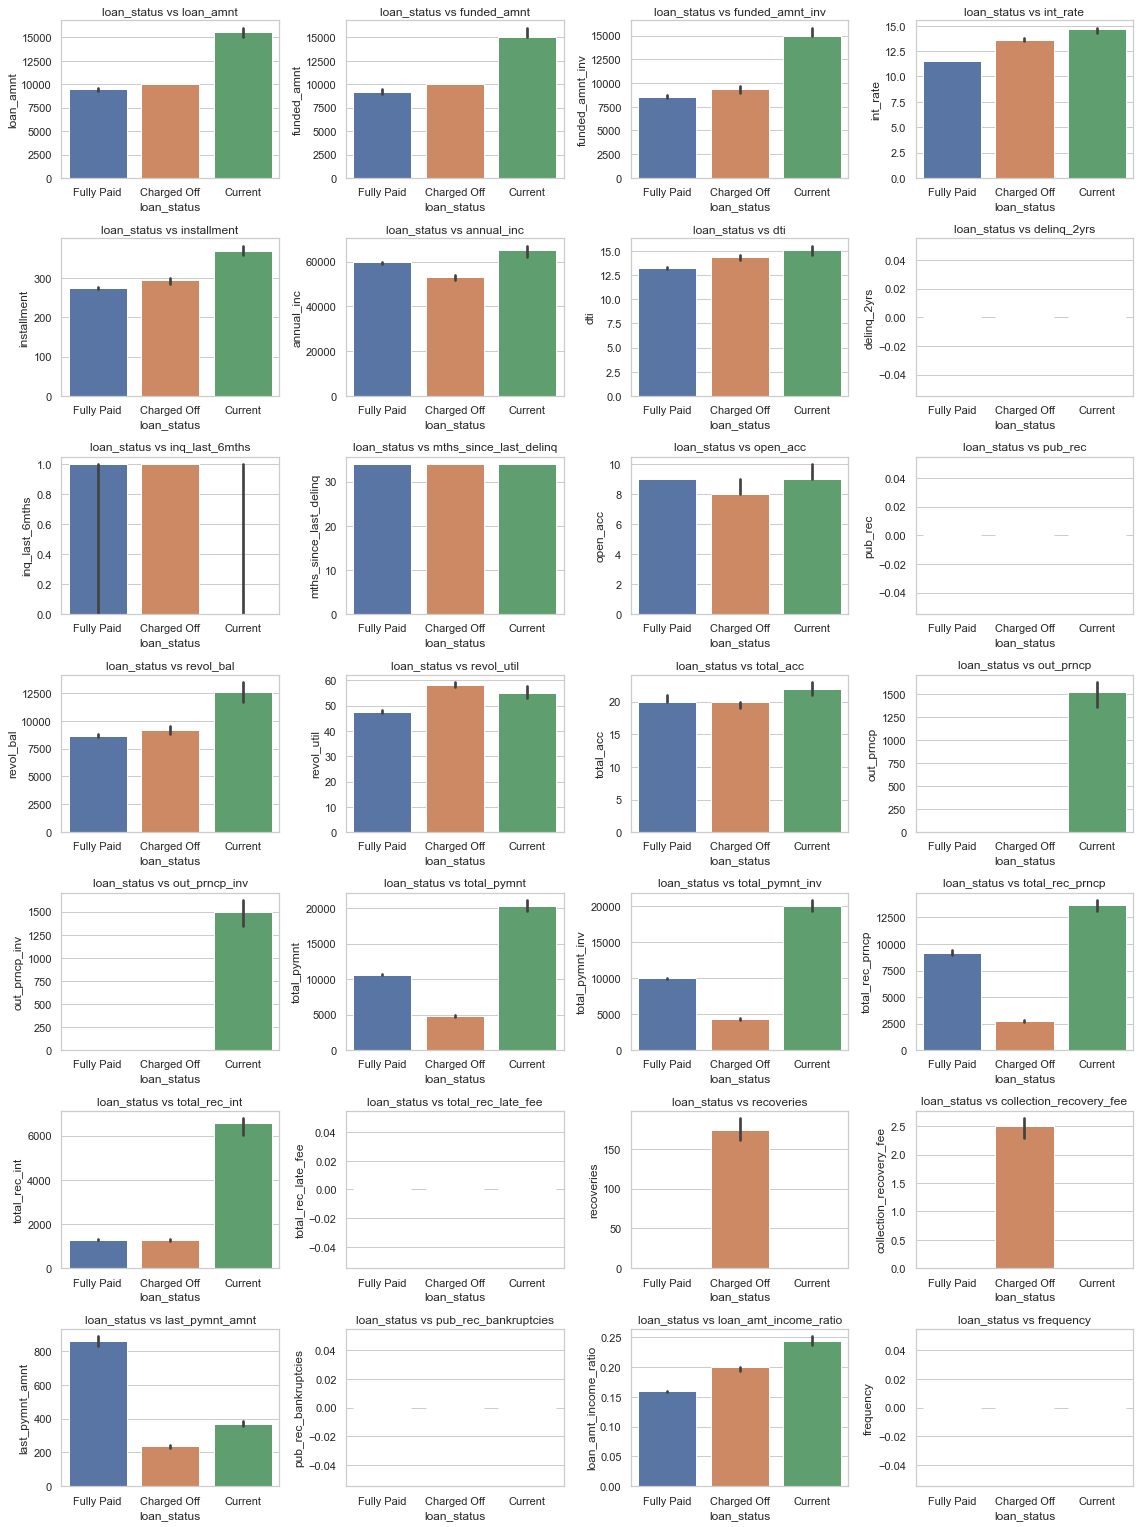

In [113]:
rows = 10
cols = 4

plt.figure(figsize=(cols*4,rows*3))

li_continous_col = list(num_list)
li_plot_continous_col = [c for c in list(li_continous_col)]

for r in range(0,rows):
    for c in range(0,cols):  
        i = r*cols+c
        if i < len(li_plot_continous_col):
            plt.subplot(rows, cols, i+1)            
            sns.barplot(x='loan_status', y=li_plot_continous_col[i], data=loan_df,estimator=np.median)
            plt.title("loan_status vs " + li_plot_continous_col[i])
            plt.xlabel("loan_status")
            plt.ylabel(li_plot_continous_col[i])            
plt.tight_layout()    
plt.show()

Continous Bivariate Analysis:

Categorical Bivaraiate Analysis:
        1.Annual Income Vs Purpose Of Loan
        2.Trust Customer Classification
        3.Loan Term Vs Delinquent Months
        4.Loan Term Vs Credit Category
        5.Loan Term Vs Years In Current Job
        6.Loan Payment Chances Vs Home Ownership

Target Variables Analysis

In [57]:
def calculate_defaulter_precentage(dataframe,column) :
    def_tab = pd.crosstab(dataframe[column], dataframe['loan_status'],margins=True)
    def_tab['All'] = def_tab['Charged Off'] + def_tab['Current'] + def_tab['Fully Paid']
    def_tab['Loan Default Probability'] = round((def_tab['Charged Off']/def_tab['All']),3)
    def_tab = def_tab[0:-1] # removing last row with sum totol 
    return def_tab

def plot_bar_line_chart(dataframe,column,stacked=False):
    
    plot = calculate_defaulter_precentage(dataframe,column)
    
    display(plot)
    
    #initializing line plot
    linePlot = plot[['Loan Default Probability']] 
    line = linePlot.plot(figsize=(20,8), marker='o',color = 'r',lw=2)
    line.set_title(dataframe[column].name.title()+' vs Loan Default Probability',fontsize=20,weight="bold")
    line.set_xlabel(dataframe[column].name.title(),fontsize=14)
    line.set_ylabel('Loan Default Probability',color = 'r',fontsize=20)
    
    #initializing bar plot
    barPlot =  plot.iloc[:,0:3] 
    bar = barPlot.plot(kind='bar',ax = line,rot=1,secondary_y=True,stacked=stacked)
    bar.set_ylabel('Number of Applicants',color = 'r',fontsize=20)
    
    plt.show()

loan_status  Charged Off  Current  Fully Paid    All  Loan Default Probability
grade                                                                         
A            602          40       9409        10051                 0.06     
B            1418         345      10204       11967                 0.12     
C            1342         262      6443        8047                  0.17     
D            1116         220      3940        5276                  0.21     
E            710          178      1920        2808                  0.25     
F            316          73       649         1038                  0.30     
G            99           17       191         307                   0.32

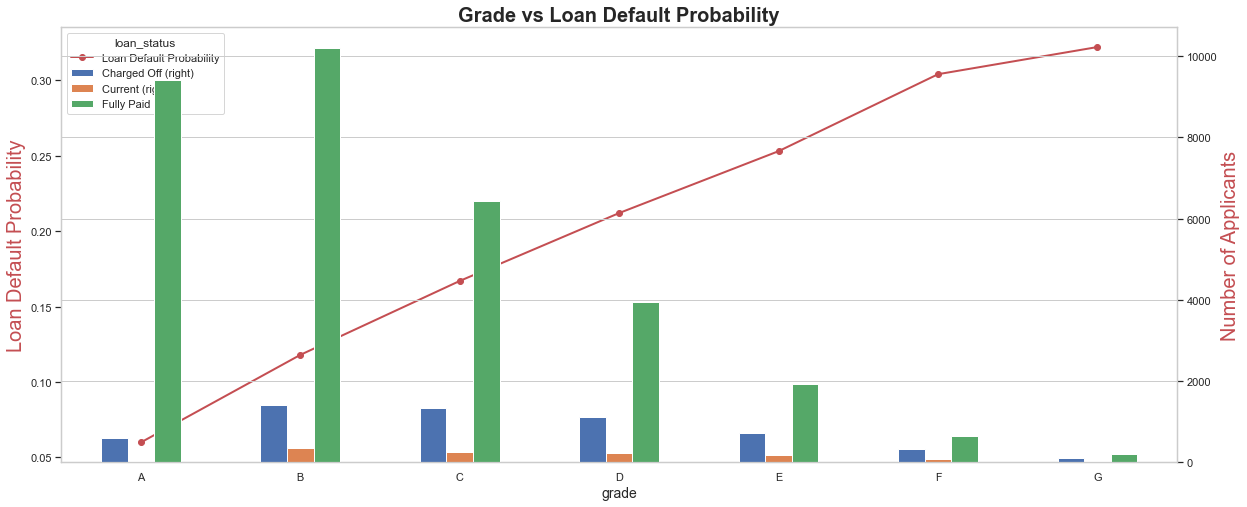

In [59]:
plot_bar_line_chart(loan_df,"grade")

## 5. Conclusion